In [ ]:

import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pip install scikit-learn

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# # Read the dataset
# df = pd.read_csv("./mta_1706.csv")

url = "https://data.ny.gov/resource/wx2t-qtaz.json?$query=SELECT%0A%20%20%60month%60%2C%0A%20%20%60subdivison%60%2C%0A%20%20%60line%60%2C%0A%20%20%60day_type%60%2C%0A%20%20%60reporting_category%60%2C%0A%20%20%60subcategory%60%2C%0A%20%20%60delays%60%0AORDER%20BY%0A%20%20%60month%60%20DESC%20NULL%20FIRST%2C%0A%20%20%60line%60%20ASC%20NULL%20LAST%2C%0A%20%20%60day_type%60%20ASC%20NULL%20LAST%2C%0A%20%20%60reporting_category%60%20ASC%20NULL%20LAST%2C%0A%20%20%60subcategory%60%20ASC%20NULL%20LAST"
data = requests.get(url).json()
df = pd.DataFrame(data)

In [ ]:
df

,month,subdivison,line,day_type,reporting_category,subcategory,delays
0,2023-08,A DIVISION,1,1,Crew Availability,Crew Availability,193
1,2023-08,A DIVISION,1,1,External Factors,External Agency or Utility,111
2,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Braking,15
3,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,10
4,2023-08,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",16
...,...,...,...,...,...,...,...
995,2023-07,B DIVISION,D,1,Crew Availability,Crew Availability,312
996,2023-07,B DIVISION,D,1,External Factors,External Debris on Roadbed,24
997,2023-07,B DIVISION,D,1,External Factors,Inclement Weather,2
998,2023-07,B DIVISION,D,1,Infrastructure & Equipment,Braking,12


In [ ]:
df.columns

Index(['month', 'subdivison', 'line', 'day_type', 'reporting_category',
       'subcategory', 'delays'],
      dtype='object')

In [ ]:
# Creating a new dataframe
X = pd.DataFrame()

In [ ]:
y = df['delays'].astype(int)                  # Copy
df_dropped = df.drop('delays', axis = 1)      # Drop delay
df_dropped

,month,subdivison,line,day_type,reporting_category,subcategory
0,2023-08,A DIVISION,1,1,Crew Availability,Crew Availability
1,2023-08,A DIVISION,1,1,External Factors,External Agency or Utility
2,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Braking
3,2023-08,A DIVISION,1,1,Infrastructure & Equipment,Door-Related
4,2023-08,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris"
...,...,...,...,...,...,...
995,2023-07,B DIVISION,D,1,Crew Availability,Crew Availability
996,2023-07,B DIVISION,D,1,External Factors,External Debris on Roadbed
997,2023-07,B DIVISION,D,1,External Factors,Inclement Weather
998,2023-07,B DIVISION,D,1,Infrastructure & Equipment,Braking


In [ ]:
# Encode text into numbers
# Using Scikit's encoder ensures the encoding is independent

label_encoder = LabelEncoder()

for item in df_dropped.columns:
    X[item] = label_encoder.fit_transform(df[item])

In [ ]:
X

,month,subdivison,line,day_type,reporting_category,subcategory
0,1,0,0,0,0,2
1,1,0,0,0,1,4
2,1,0,0,0,2,0
3,1,0,0,0,2,3
4,1,0,0,0,2,6
...,...,...,...,...,...,...
995,0,1,10,0,0,2
996,0,1,10,0,1,5
997,0,1,10,0,1,7
998,0,1,10,0,2,0


In [ ]:
y

0      193
1      111
2       15
3       10
4       16
      ... 
995    312
996     24
997      2
998     12
999     16
Name: delays, Length: 1000, dtype: int64

In [ ]:
y.value_counts()

2      60
1      58
5      31
11     28
3      27
       ..
221     1
359     1
171     1
483     1
312     1
Name: delays, Length: 230, dtype: int64

## Data Exploration

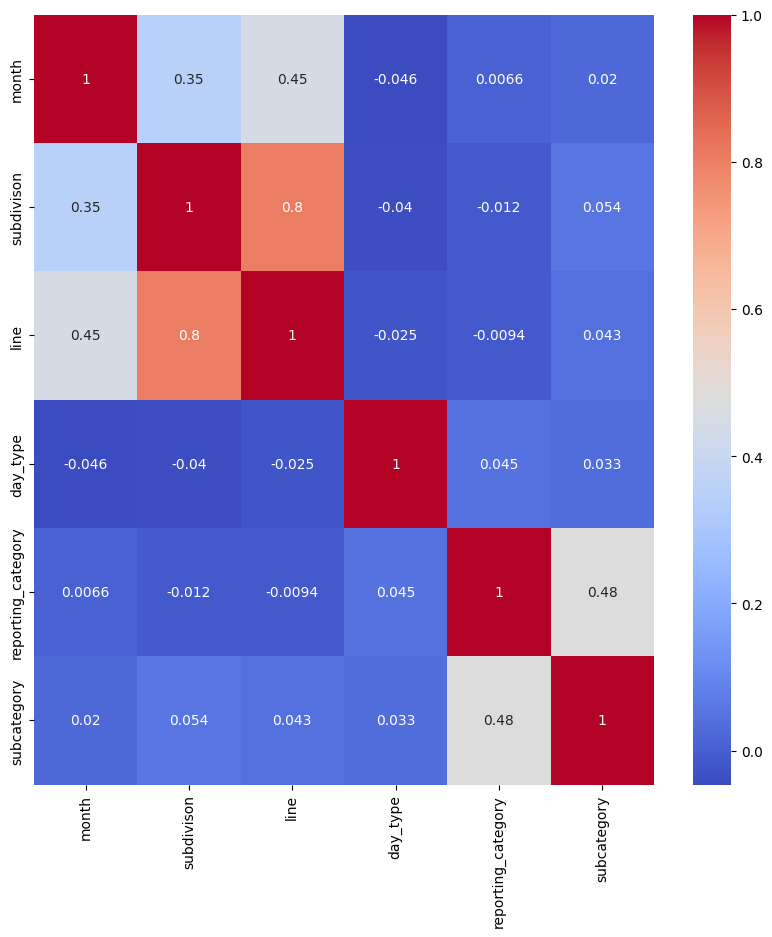

In [ ]:
# Heatmap
plt.figure(figsize = (10, 10))                                                     # Figure Size
sns.heatmap(X.corr(), cmap="coolwarm", annot = True)                            # Parameters: (1) 'cmap' controls the color used; (2) 'annot' is a boolean to plot correlation constant
plt.show()

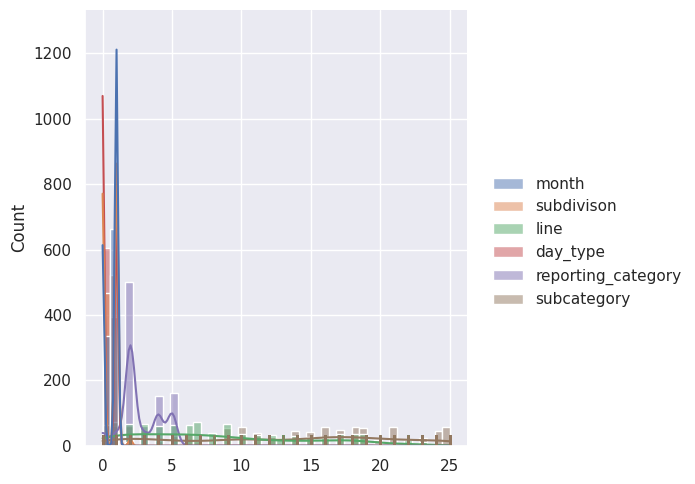

In [ ]:
# Histogram, frequency

sns.set(style = 'darkgrid')                                   # Grid Style

# Parameters: (1) 'kde' draws a line through all data points, (2) 'rug' plots marks along x-axis
sns.displot(data = X, kde = True, rug = True, linewidth = 1, color = "red")

In [ ]:
# Statistics for features

print("Statistics on X DataFrame: ")
print(X.info())
print('\n'*2)

print("Statistical Values of each features: ")
print(X.describe())

Statistics on X DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   month               1000 non-null   int64
 1   subdivison          1000 non-null   int64
 2   line                1000 non-null   int64
 3   day_type            1000 non-null   int64
 4   reporting_category  1000 non-null   int64
 5   subcategory         1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB
None



Statistical Values of each features: 
             month   subdivison       line     day_type  reporting_category  \
count  1000.000000  1000.000000  1000.0000  1000.000000         1000.000000   
mean      0.664000     0.546000     8.3090     0.394000            2.659000   
std       0.472575     0.521686     6.1556     0.488879            1.412343   
min       0.000000     0.000000     0.0000     0.000000            0.000000   
25%       0

In [ ]:
# Statistics for target variable

print("Information on DataFrame: ")
print(y.info())
print('\n'*2)

print("Statistical Values of target: ")
print(y.describe())

Information on DataFrame: 
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: delays
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
None



Statistical Values of target: 
count    1000.000000
mean       91.942000
std       449.837277
min         1.000000
25%         7.750000
50%        20.000000
75%        67.000000
max      8712.000000
Name: delays, dtype: float64


In [ ]:
y.shape

(1000,)

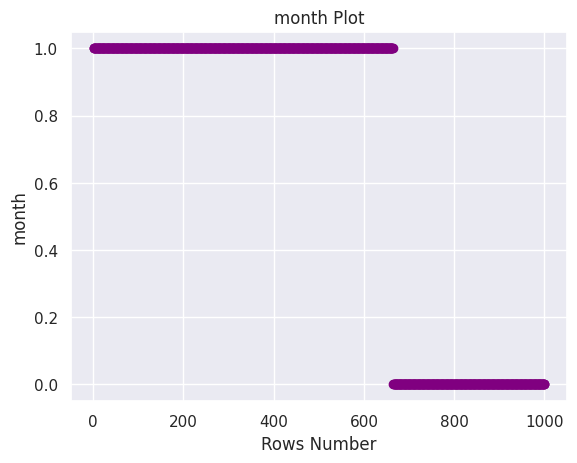

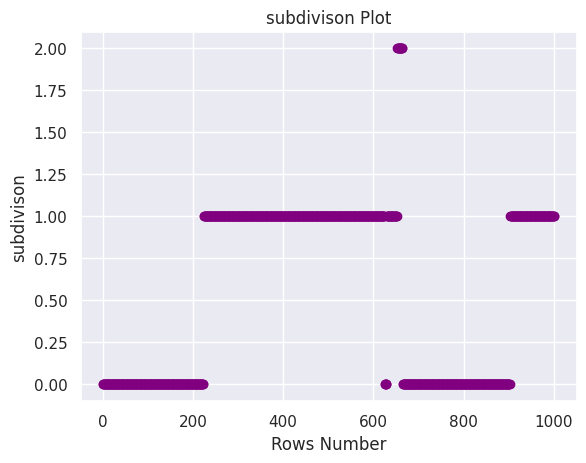

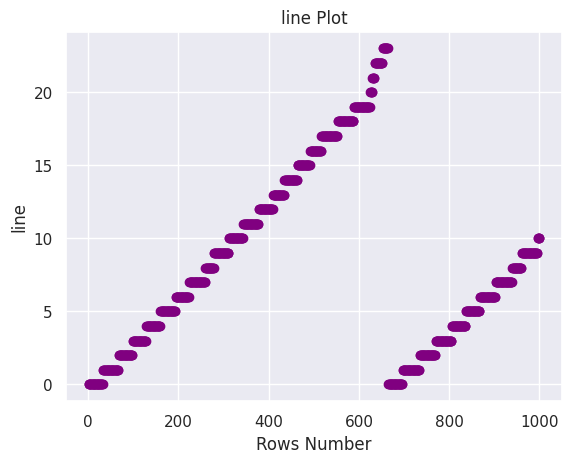

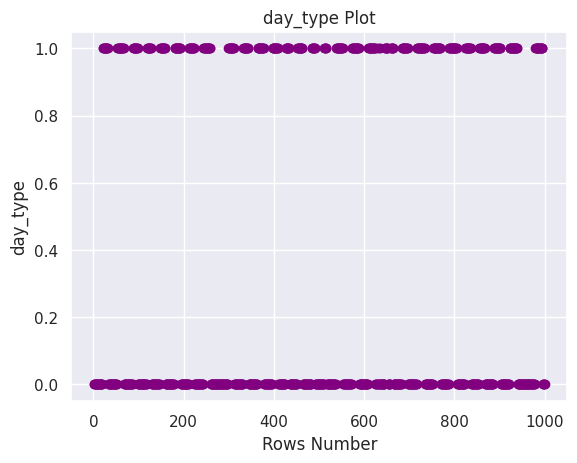

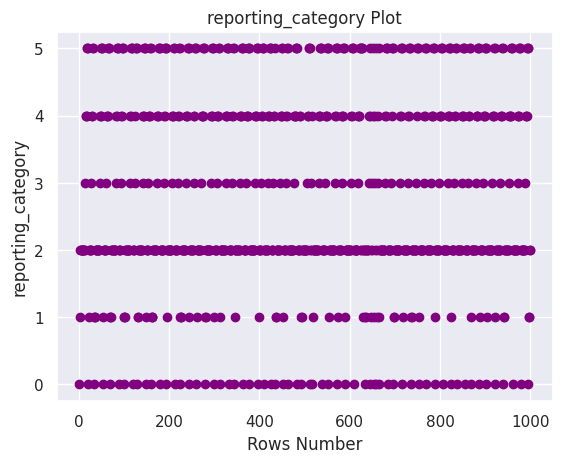

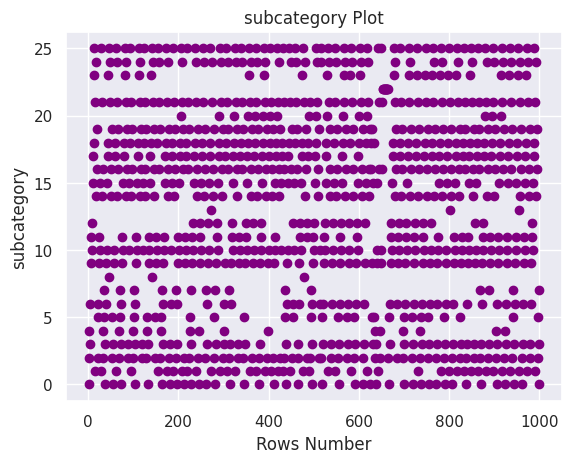

In [ ]:
# Scatterplot for Targets

x_info = pd.DataFrame([(i+1) for i in range(y.shape[0])])

for series in X:

  # Using .loc(), for individual columns, information from all rows are plotted against number of instances
  plt.scatter(x_info, X.loc[:, series], color = "purple")

  # Graph Labels and Title
  title = str(series) + " Plot"
  plt.title(title)
  plt.xlabel('Rows Number')
  plt.ylabel(series)
  plt.show()

  print('\n'*5)


<br> <br>

## Neural Network

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape to a column vector
X_test = torch.tensor(X_test, dtype=torch.float32)

In [ ]:
# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = RegressionModel(input_size=X_train.shape[1])

In [ ]:
# Define the loss function (mean squared error) and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 70
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

In [ ]:
# Calculate RMSE for training data
with torch.no_grad():
    y_train_pred = model(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred.numpy())
    rmse_train = np.sqrt(mse_train)
    print(f"RMSE for Training Data: {rmse_train}")

RMSE for Training Data: 429.1238708496094


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse_test = mean_squared_error(y_test, y_pred.numpy())
    rmse_test = np.sqrt(mse_test)
    print(f"RMSE for Training Data: {rmse_test}")

RMSE for Training Data: 555.9249090051753


<br> <br>
## Observation

Here, we can see that the variation between RMSE for training and testing splits is merely 20%. The spike in RMSE value is owing to the noise and inconsistency in the dataset used. <br> <br>

Besides, delay is caused by external factors like time of day and number of passengers; however, finding enough data with required features is extremely challenging. <br> <br>

Despite the inavailability of data, the consistency in RMSE values between training and testing split highlights the performance of the model. Thus, nearly accurate predictions can be made using the available features set.

<br> <br>

------------------------

## Predicting Delays

In [ ]:

# Function to predict the number of delays
def predictProb(new_data):
  new_data = scaler.transform(new_data)

  # PyTorch Tensor
  new_data_tensor = torch.tensor(new_data, dtype=torch.float32)

  # Use the trained model to make predictions on the new data
  model.eval()
  with torch.no_grad():
      predictions = model(new_data_tensor)

  # retreive the predicted number of delays
  predicted_delays = predictions.item()
  return predicted_delays

<br> <br>

## Mapping for new data:

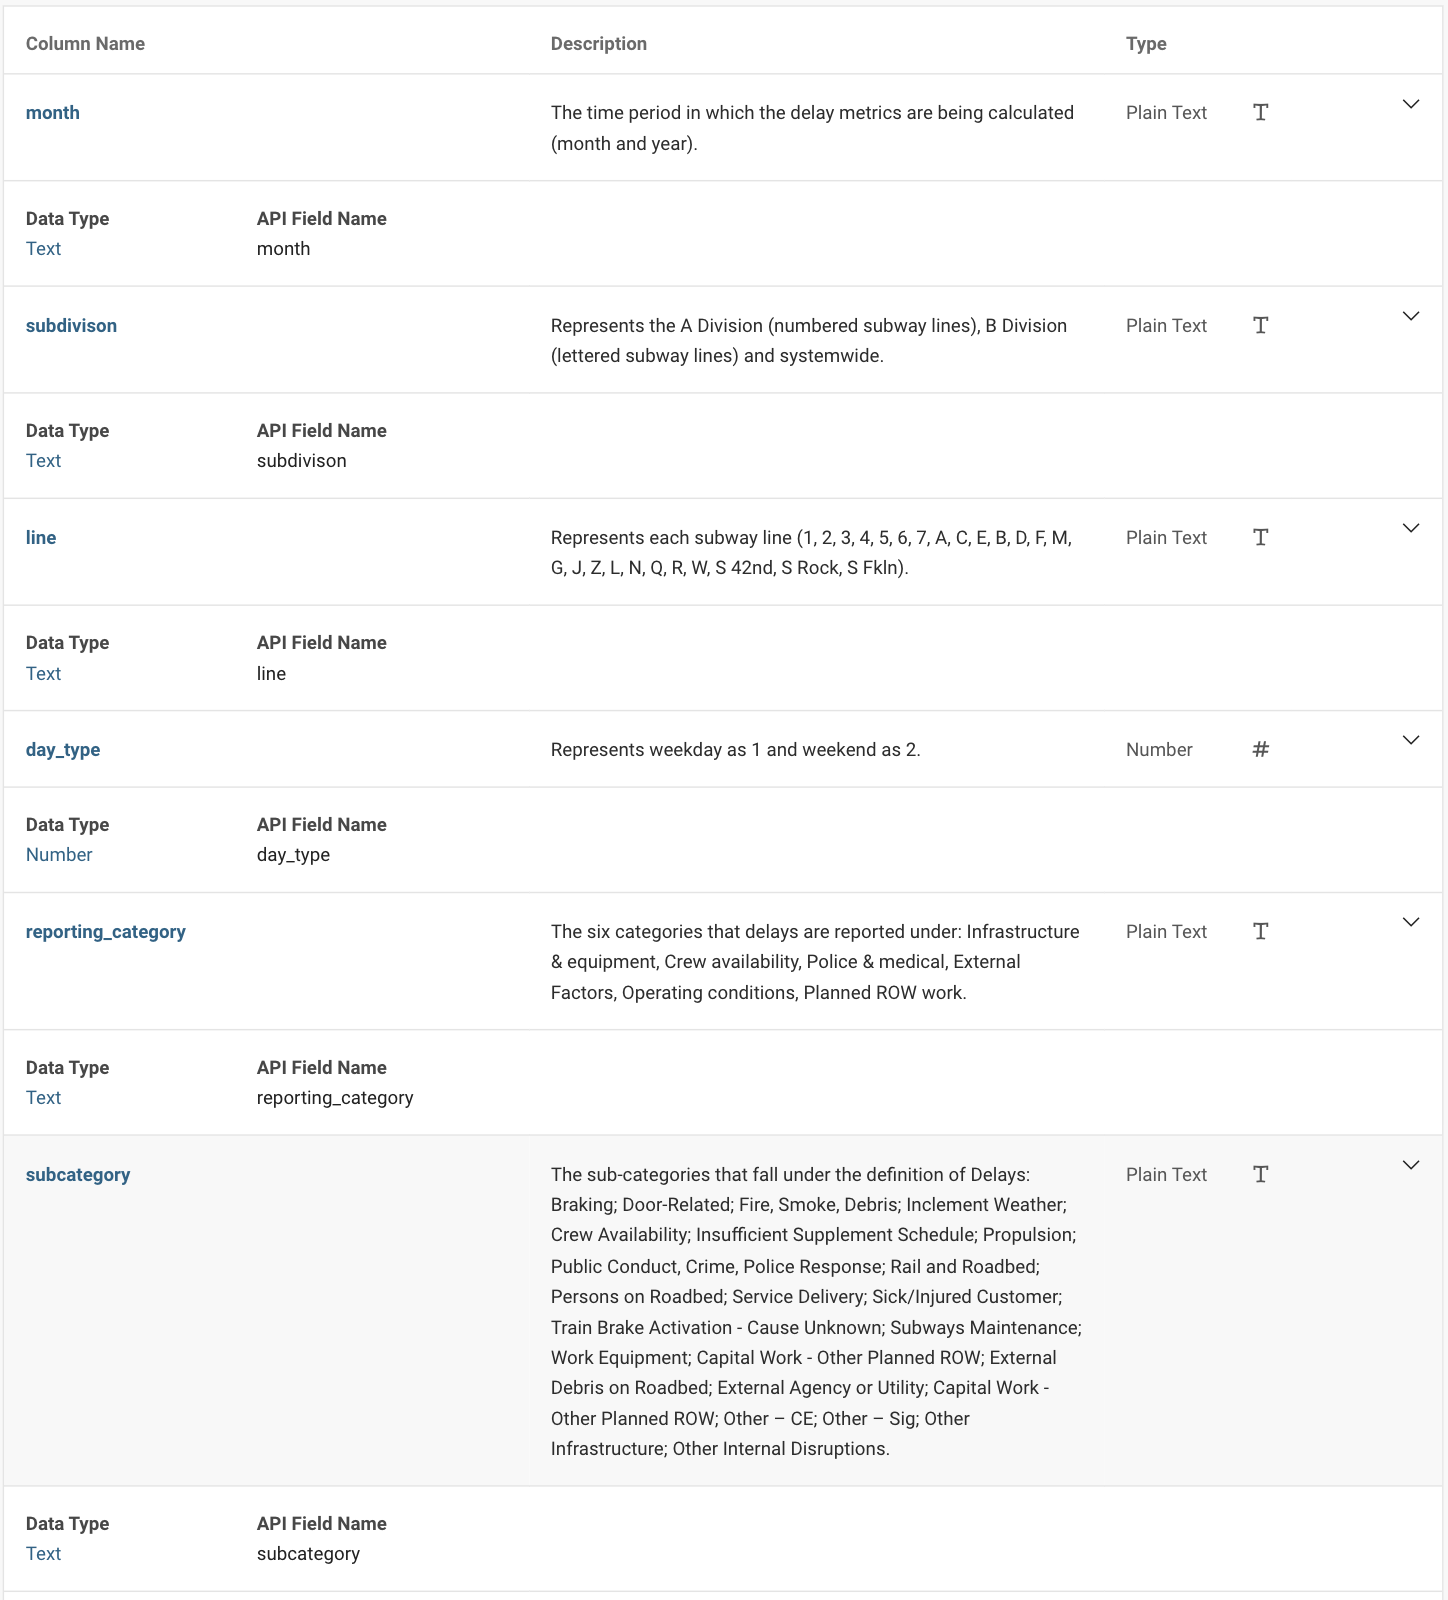

Source: https://data.ny.gov/TransportationMTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz
<br> <br>

First Number = Months (0-1) : (0 is for July, 1 is for August) <br> <br>
Second Number = Train Division (0, 1, 2) : (0 for A, 1 for B, 2 for System Wide) <br> <br>

Third Number: Train Line ( 0 - 23) : ('1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'JZ', 'L', 'M', 'N', 'Q', 'R', 'S 42nd', 'S Fkln', 'S Rock',
       'Systemwide') <br> <br>

Forth Number: Day Type (0, 1) : [0 for weekend, 1 for weekday] <br> <br>

Fifth Number: Category (0 - 6) : ['Crew Availability', 'External Factors',
       'Infrastructure & Equipment', 'Operating Conditions',
       'Planned ROW Work', 'Police & Medical'] <br> <br>

Sixth Number: Sub Category of Delay (0 - 26) : [Different kinds]  

<br> <br> <br> <br> <br>

For accurate interpretation of the result, use the following <br>
Mapped Range of Values: <br>

(0-1), (0-2), (0-23), (0-1), (0-6), (0-26)

<br>

In [ ]:
# Standardize the new data (same as the training data)
# July, Numbered Train, Train Number: 2, Weekend, Police & Medical, Inclement Weather
new_data = [[7, 0, 2, 0, 6, 6]]


# Predicted Number of delays during the aforementioned situation
predicted_delays = predictProb(new_data)
print(f"Predicted Number of Delays: {predicted_delays}")

Predicted Number of Delays: 24.394624710083008


<br> <br>

# Processing Bus Stations Data

Due to the lack of data related to 'bus delays', we train the model using subway data and correlate the model with bus stations information to predict delays.

In [ ]:
bus_stations = ["Sunset Park (West)", "Bensonhurst", "Woodhaven", "Coney Island-Sea Gate", "Howard Beach-Lindenwood", "Gravesend (South)", "College Point", "Bath Beach", "Jamaica", "Prospect Park", "East New York (North)", "Brownsville"]

In [ ]:
len(bus_stations)

12

In [ ]:
bus_stations_loc = ["Sunset Park (West) [40.653814, -74.00524]",
"Fort Wadsworth [40.599129, -74.062971]",
"Bensonhurst [40.606983, -74.002384]",
"Woodhaven [40.693813, -73.851904]",
"Port Richmond [40.633841, -74.125398]",
"Mariner’s Harbor-Arlington-Graniteville [40.63699, -74.159932]",
"Annadale-Huguenot-Prince’s Bay-Woodrow [40.531413, -74.217676]",
"Coney Island-Sea Gate [40.577395, -74.000262]",
"Rosedale [40.66568, -73.73623]",
"Grasmere-Arrochar-South Beach-Dongan Hills [40.598413, -74.0919]",
"Howard Beach-Lindenwood [40.664506, -73.849797]",
"West New Brighton-Silver Lake-Grymes Hill [40.634584, -74.117749]",
"Gravesend (South) [40.592785, -73.978889]",
"College Point [40.781563, -73.846043]",
"Bath Beach [40.608191, -74.001599]",
"Jamaica [40.712528, -73.784081]",
"Prospect Park [40.66007, -73.977772]",
"East New York (North) [40.676651, -73.890777]",
"Arden Heights-Rossville [40.550223, -74.187657]",
"Brownsville [40.67504, -73.904496]" ]

In [ ]:
# Function to remove location from name of the bus stations
def parse_string(arr):
  item_list = []

  # Go through all the strings
  for item in arr:

    index = item.find(' [')

    # Extract the substring up to the square bracket
    result = item[:index]
    item_list.append(result)

  return item_list


In [ ]:
updated_bus_st = parse_string(bus_stations_loc)
print(updated_bus_st)
print(len(updated_bus_st))

['Sunset Park (West)', 'Fort Wadsworth', 'Bensonhurst', 'Woodhaven', 'Port Richmond', 'Mariner’s Harbor-Arlington-Graniteville', 'Annadale-Huguenot-Prince’s Bay-Woodrow', 'Coney Island-Sea Gate', 'Rosedale', 'Grasmere-Arrochar-South Beach-Dongan Hills', 'Howard Beach-Lindenwood', 'West New Brighton-Silver Lake-Grymes Hill', 'Gravesend (South)', 'College Point', 'Bath Beach', 'Jamaica', 'Prospect Park', 'East New York (North)', 'Arden Heights-Rossville', 'Brownsville']
20


<br> <br>

Using Google Maps and Bing AI, the nearest metro stations to the aforementioned bus stations were picked, and the most famous train information was collected for each station. <br> <br>  

In [ ]:
nearest_metro = [
                "36 St", "Old Town", "Bay Pkwy", "Woodhaven Blvd", "Port Richmond",
                 "Arlington", "Annadale", "Coney Island Stillwell Av", "Rosedale",
                 "Grasmere", "Howard Beach JFK", "Tompkinsille", "Avenue X", "Flushing Main",
                 "Bay Pkwy", "Jamaica Center Parsons", "Prospect Park", "Broadway Junction",
                 "Eltingville Transit Center", "Rutland Rd-3"
                  ]

len(nearest_metro)

20

In [ ]:
busiest_line = ['N', 'S', 'D', 2, 5, 'S', 'S', 'F', 'L', 'S', 'A', 'S', 'F', 7, 'B', 4, 6, 'A', 6, 3]
len(busiest_line)

20

In [ ]:
# month - august, day - weekday, category - operating conditions, sub_cat = inclement weather
month_1, day_4, cat_5, sub_cat_6 = 1, 1, 4, 6

In [ ]:
trainMap = ['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'JZ', 'L', 'M', 'N', 'Q', 'R', 'S']

In [ ]:

delay_list = []
trainType_2 = -1
trainNum_3 = -1

# Loop through all the lines and find suitable parameter encoding for prediction
for item in busiest_line:

  # if it's not an integer, set train type to 1 i.e. lettered train encoding and vice versa
  if isinstance(item, int):
    trainType_2 = 0
    trainNum_3 = trainMap.index(str(item))
  else:
    trainType_2 = 1
    trainNum_3 = trainMap.index(item)

  # Predict and append to the list
  input_arr = [[month_1, trainType_2, trainNum_3, day_4, cat_5, sub_cat_6]]     # Search Array
  temp_list = (predictProb(input_arr))
  delay_list.append(temp_list)



In [ ]:
delay_list = [round(i) for i in delay_list]
delay_list

[5, 6, 4, 3, 3, 6, 6, 4, 5, 6, 4, 6, 4, 3, 4, 3, 3, 4, 3, 3]

In [ ]:
# Create a concatenated list
result = [[updated_bus_st[i], busiest_line[i], delay_list[i]] for i in range(len(delay_list))]

In [ ]:
# Create a dataframe to export
export_df = pd.DataFrame(data = result, columns = ["bus_stations", "busiest_line", "predicted_delay"])

In [ ]:
export_df

,bus_stations,busiest_line,predicted_delay
0,Sunset Park (West),N,5
1,Fort Wadsworth,S,6
2,Bensonhurst,D,4
3,Woodhaven,2,3
4,Port Richmond,5,3
5,Mariner’s Harbor-Arlington-Graniteville,S,6
6,Annadale-Huguenot-Prince’s Bay-Woodrow,S,6
7,Coney Island-Sea Gate,F,4
8,Rosedale,L,5
9,Grasmere-Arrochar-South Beach-Dongan Hills,S,6


In [ ]:
# export to a csv file
export_df.to_csv('../placement/data/metro_delay.csv')